In [1]:
#!pip install scikit-optimize
#!pip install anomatools

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_moons
from anomatools.models import SSDO
from skopt import gp_minimize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.io import arff
import warnings
from anomatools.models.scalers import SquashScaler
from anomatools.models._knno import kNNO

from BALLAD import *

def ignore_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)
    warnings.simplefilter(action='ignore', category=DeprecationWarning)
ignore_warnings()


numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


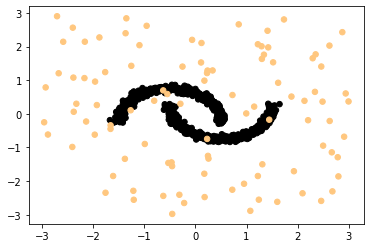

In [3]:
np.random.seed(331)
n_samples = 900
n_anom = 100
X = make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]-np.array([0.5, 0.25])
X = np.concatenate([X, np.random.uniform(low=-3, high=3, size=(n_anom, 2))], axis=0)

y_true = -1*np.ones(n_samples + n_anom, np.int)
y_true[-n_anom:] = 1
colors = np.array(["#377eb8", "#ff7f00"])
plt.scatter(X[:, 0], X[:, 1], s=30, c=y_true, cmap=plt.cm.copper)

plt.show()

In [4]:
c_r = 0.1
c_fp = 1
c_fn = 1
metric = 'entropy'
seed = 331
np.random.seed(seed)
dataset_name = 'moon'
data_path = ''
tot_budget = 200
pool_budget = 10
plots = True
# Load data
X_train, y_train, X_val, y_val, X_test, y_test, contamination = load_dataset(dataset_name, data_path, 
                                                                             random_state = seed)

In [ ]:
# Explaining the following plots:
# 1. Each plot corresponds to one iteration of the allocation loop;
# 2. Dark red shades indicate high probability of positive class (anomaly), while low values indicate low probabilities
# 3. The green line is the detector's decision boundary;
# 4. The blue region is the rejection region;
# 5. The green cross marks are the labeled acquired via Active Learning;
# 6. After the plot, we print the total cost at test time;
# 7. The first two plots show the initial allocation rounds (first for LR, second for AL).

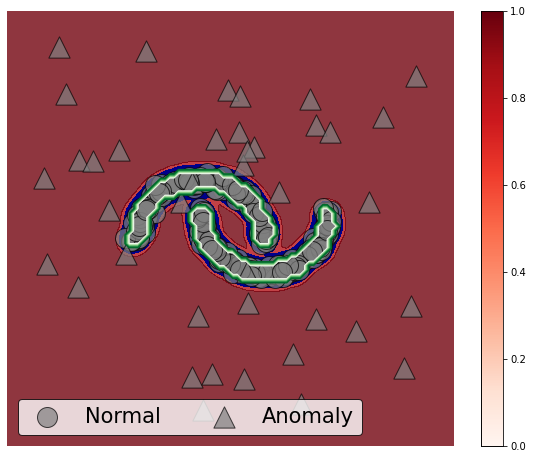

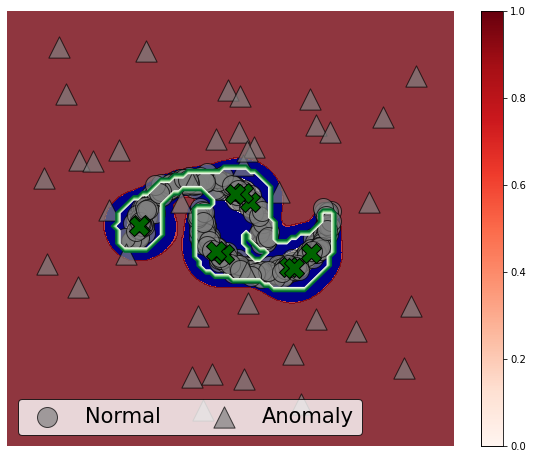

Budget used: 30 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


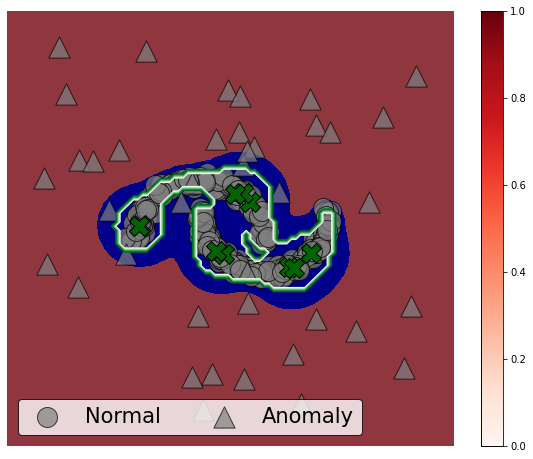

Test Cost using BALLAD: 0.0315
Budget used: 40 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


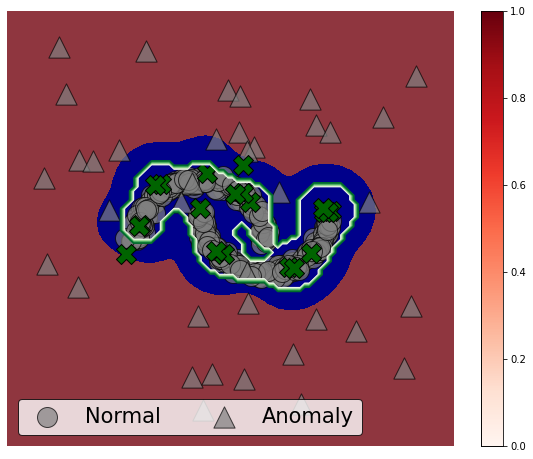

Test Cost using BALLAD: 0.057
Budget used: 50 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


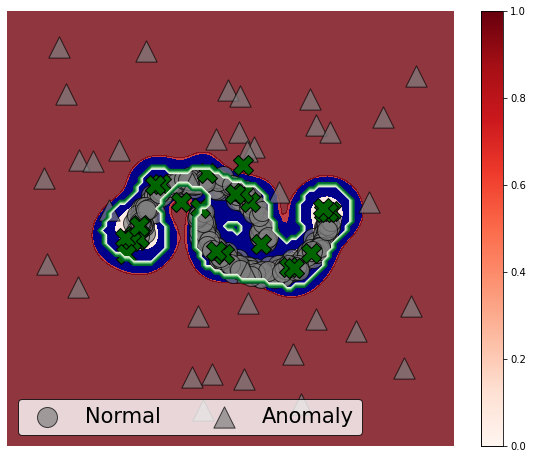

Test Cost using BALLAD: 0.0225
Budget used: 60 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


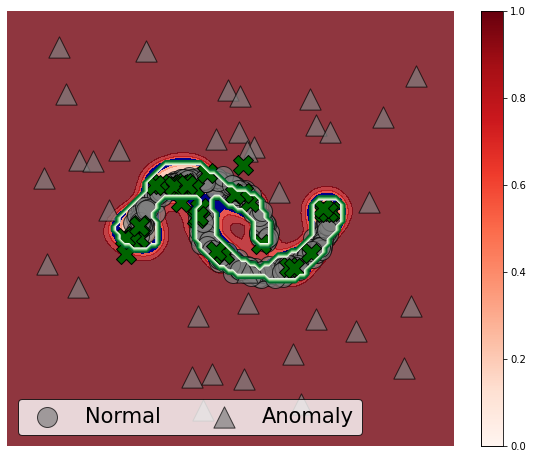

Test Cost using BALLAD: 0.014
Budget used: 70 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


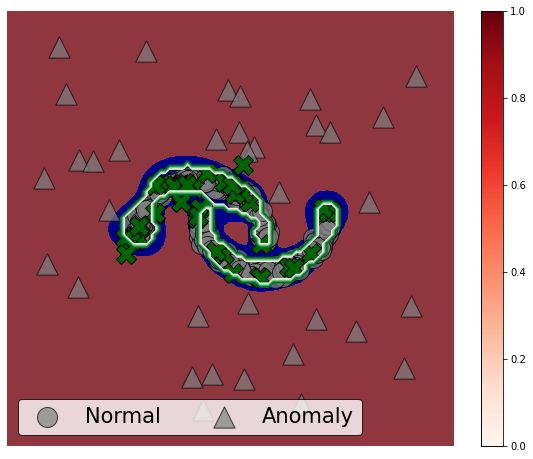

Test Cost using BALLAD: 0.045
Budget used: 80 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


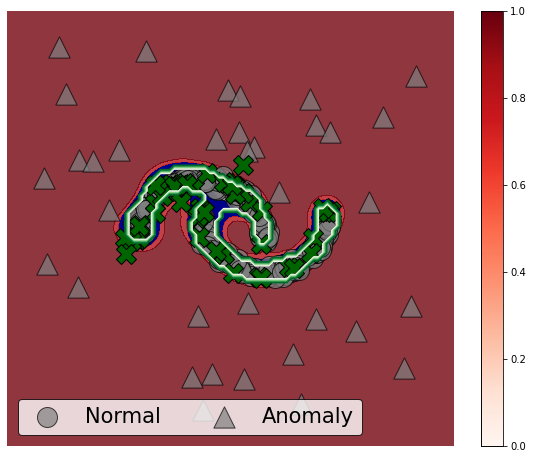

Test Cost using BALLAD: 0.011
Budget used: 90 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


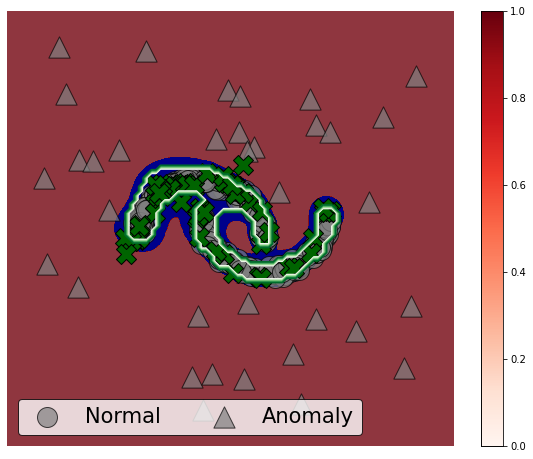

Test Cost using BALLAD: 0.0425
Budget used: 100 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


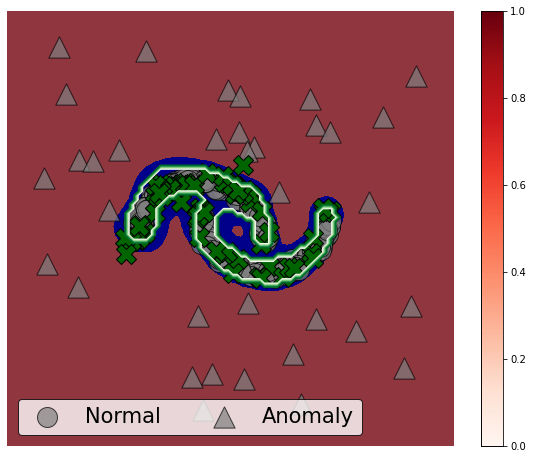

Test Cost using BALLAD: 0.0395
Budget used: 110 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


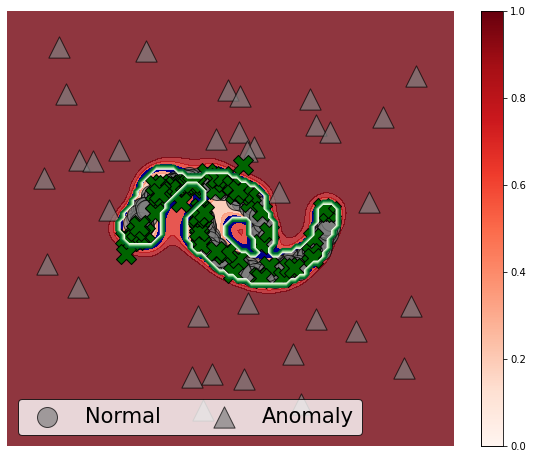

Test Cost using BALLAD: 0.011
Budget used: 120 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


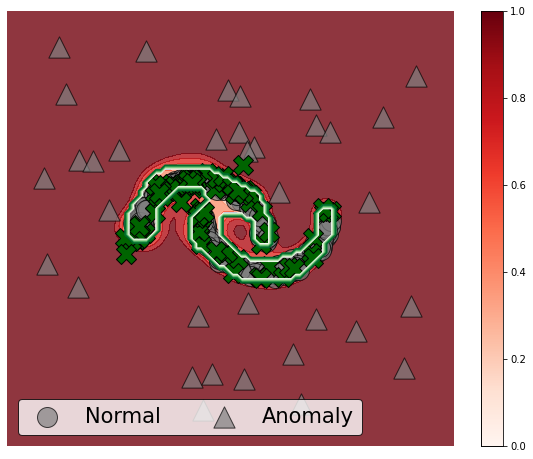

Test Cost using BALLAD: 0.0155
Budget used: 130 out of: 200 --> Current Chosen Strategy: ___ Active Learning ___


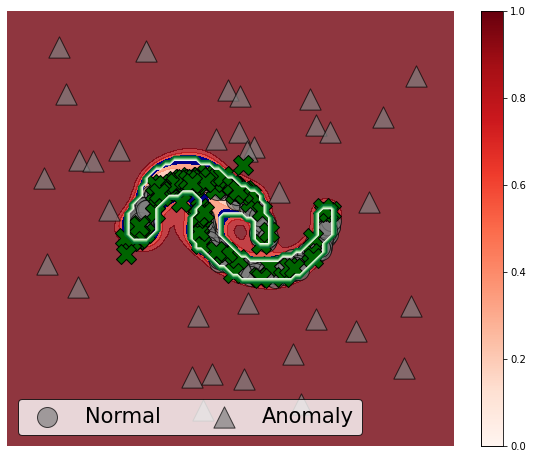

Test Cost using BALLAD: 0.011
Budget used: 140 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


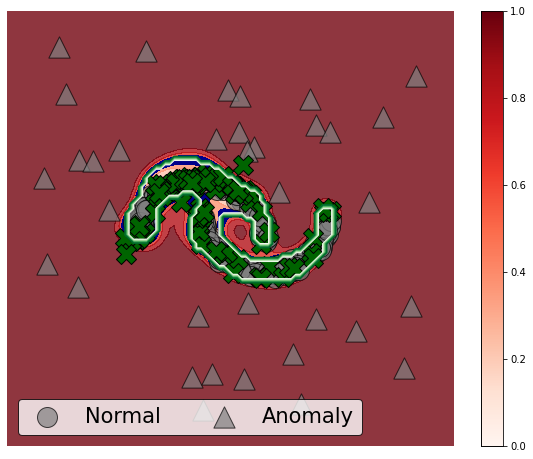

Test Cost using BALLAD: 0.011
Budget used: 150 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


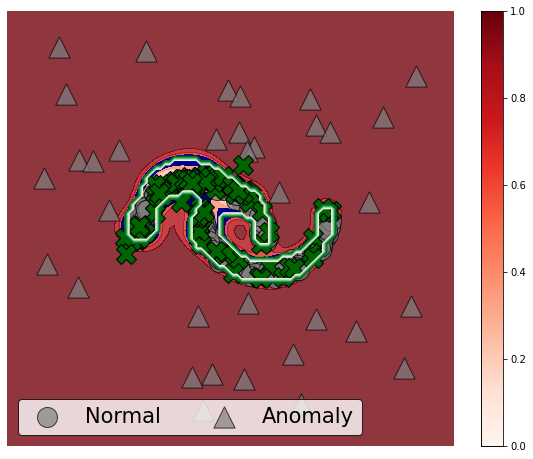

Test Cost using BALLAD: 0.011
Budget used: 160 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


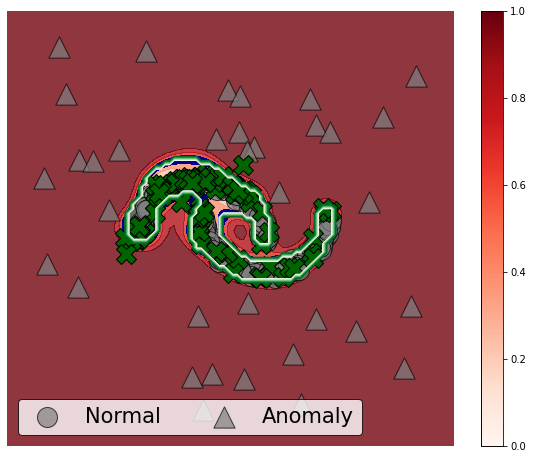

Test Cost using BALLAD: 0.011
Budget used: 170 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


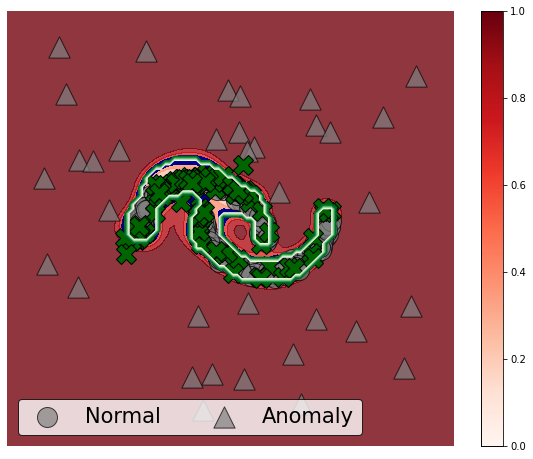

Test Cost using BALLAD: 0.011
Budget used: 180 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


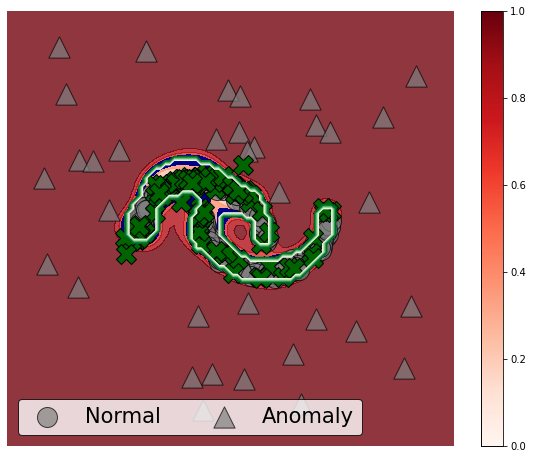

Test Cost using BALLAD: 0.011
Budget used: 190 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


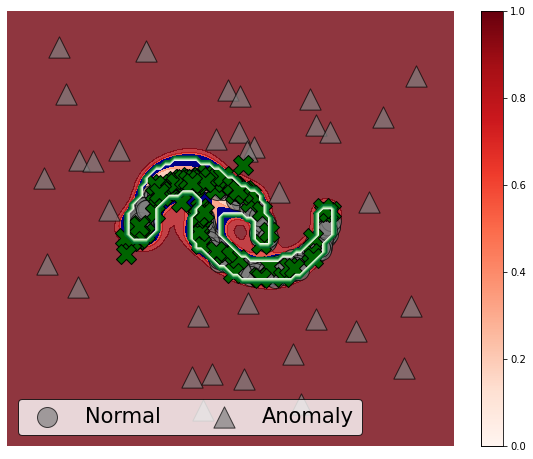

Test Cost using BALLAD: 0.011
Budget used: 200 out of: 200 --> Current Chosen Strategy: ___ Learning to Reject ___


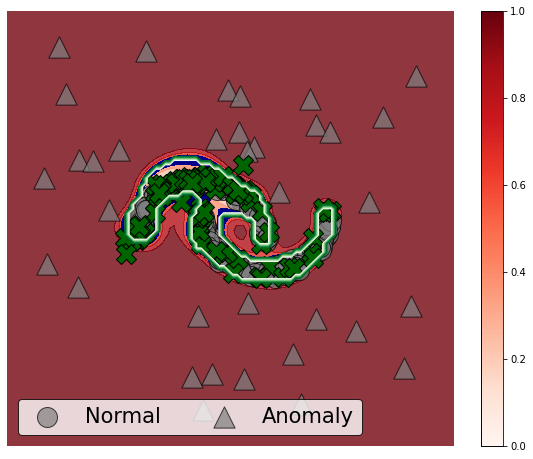

Test Cost using BALLAD: 0.011


In [5]:
# Run Ballad
run_BALLAD(X_train, y_train, X_val, y_val, X_test, y_test, contamination, metric, tot_budget, pool_budget, 
           c_r, c_fp, c_fn, seed, plots)